In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Veriyi yükle
df = pd.read_csv("final_data.csv")
df_train = pd.read_csv("train_data.csv")
df_test = pd.read_csv("test_data.csv")
df_val = pd.read_csv("validation_data.csv")

# Veri setlerini hazırlama
Train_X = df_train[["Alfas", "Frenkans"]]
Train_Y = df_train["Emilim"]

Test_X = df_test[["Alfas", "Frenkans"]]
Test_Y = df_test["Emilim"]

Val_X = df_val[["Alfas", "Frenkans"]]
Val_Y = df_val["Emilim"]


In [ ]:
from datetime import datetime

def logging(message,title):
    with open("log.txt","a+", encoding="utf-8") as f:
        f.write(f"""
                {title}  --  {datetime.now()}
{message}


            """)

# burada decision tree var ama randomforest gibi aynı sonuc var 

In [59]:
df_train["Alfas"].unique()

array([1.66, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77,
       1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88,
       1.89, 1.9 , 1.91, 1.92, 1.93])

Train MSE: 3.4816612485223007e-20, Train R2: 1.0
Test MSE: 0.027208937301155364, Test R2: -1.8151202656715917
Validation MSE: 0.03549570816388033, Validation R2: -3.693345862453967
Yeni Alfa için Validation MSE: 0.0485358865277431
Yeni Alfa için Validation R2: -101.67595665431456


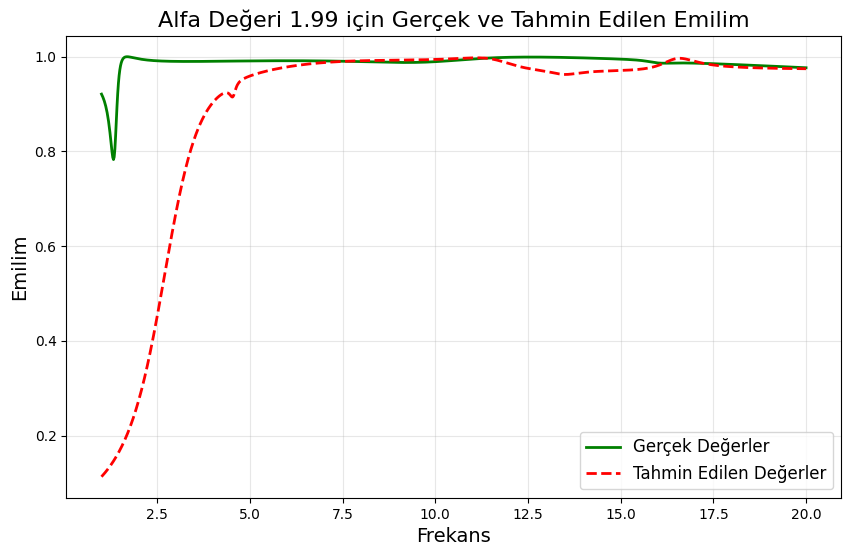

In [69]:


# Decision Tree Modeli
tree_model = DecisionTreeRegressor(max_depth=100, random_state=42)
tree_model.fit(Train_X, Train_Y)

# Tahminler ve Değerlendirme
train_predictions = tree_model.predict(Train_X)
val_predictions = tree_model.predict(Val_X)
test_predictions = tree_model.predict(Test_X)

train_mse = mean_squared_error(Train_Y, train_predictions)
train_r2 = r2_score(Train_Y, train_predictions)

val_mse = mean_squared_error(Val_Y, val_predictions)
val_r2 = r2_score(Val_Y, val_predictions)

test_mse = mean_squared_error(Test_Y, test_predictions)
test_r2 = r2_score(Test_Y, test_predictions)

# Sonuçları yazdırma
print(f"Train MSE: {train_mse}, Train R2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R2: {test_r2}")
print(f"Validation MSE: {val_mse}, Validation R2: {val_r2}")

# Yeni bir Alfa değeri için tahmin
new_a = 1.99  # İstediğiniz Alfa değeri
filtered_data = df[df["Alfas"] == new_a]
true_values_for_selected_alfas = filtered_data["Emilim"]
frequencies_for_selected_alfas = filtered_data["Frenkans"]
len_frequencies = len(frequencies_for_selected_alfas)

new_frequencies = frequencies_for_selected_alfas
new_data = pd.DataFrame({'Alfas': [new_a] * len_frequencies, 'Frenkans': new_frequencies})
new_predictions = tree_model.predict(new_data)

# Yeni alfa için skorlar
val_mse_new = mean_squared_error(true_values_for_selected_alfas, new_predictions)
val_r2_new = r2_score(true_values_for_selected_alfas, new_predictions)

print(f"Yeni Alfa için Validation MSE: {val_mse_new}")
print(f"Yeni Alfa için Validation R2: {val_r2_new}")

# Gerçek ve tahmin edilen değerleri çizmek için fonksiyon
def plot_emilim_values(frequencies, true_values, predicted_values, YLabel="Emilim", XLabel="Frekans", title="Gerçek ve Tahmin Edilen Emilim Değerleri"):
    """
    Frekanslara karşı gerçek ve tahmin edilen emilim değerlerini çizmek için bir fonksiyon.
    
    Parametreler:
        frequencies (array-like): X eksenindeki frekans değerleri.
        true_values (array-like): Gerçek emilim değerleri.
        predicted_values (array-like): Tahmin edilen emilim değerleri.
        label (str): Grafiğin başlığı. (Opsiyonel; varsayılan bir başlık atanır)
    """
    plt.figure(figsize=(10, 6)) 

    # Gerçek emilim değerlerini çiz
    plt.plot(frequencies, true_values, label="Gerçek Değerler", color="green", linewidth=2)

    # Tahmin edilen emilim değerlerini çiz
    plt.plot(frequencies, predicted_values, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)

    # Grafik başlıkları ve etiketler
    plt.title(title, fontsize=16)
    plt.xlabel(XLabel, fontsize=14)
    plt.ylabel(YLabel, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

    plt.show()

# Grafik oluştur
plot_emilim_values(
    frequencies=frequencies_for_selected_alfas,
    true_values=true_values_for_selected_alfas,
    predicted_values=new_predictions,
    title=f"Alfa Değeri {new_a} için Gerçek ve Tahmin Edilen Emilim"
)
message=f"""Train MSE: {train_mse}, Train R2: {train_r2}
Test MSE: {test_mse}, Test R2: {test_r2}
Validation MSE: {val_mse}, Validation R2: {val_r2}
Yeni Alfa için Validation MSE: {val_mse_new}
Yeni Alfa için Validation R2: {val_r2_new}
"""
logging(message,"decision tree ayırarrek dataları 100 derinlik")



# bundan sonrasi RandomForestRegressor
öncelikle hıc verisi olmayan yani 2 ve 1.94 degerlerini ayırdım bunları asla gormedi hocanın yeni verdigi datalari gibi dusun  
arkasından devam ettigimde modelinde cokta iyi olmadıgını gordum 

soyle bu iki degeri de aynı kefeye koyarsak 100 sonuc alıyoruz
ayırdıgımza degerler <br>
Train MSE: 9.667132906142189e-07, Train R2: 0.9998930646298407 <br>
Test MSE: 1.2200362098099413e-05, Test R2: 0.9986222383650851 <br>
vali MSE: 0.0005055550066092001, vali R2: -0.011018623635409064


In [37]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [38]:
TrainAndTest = df[(df["Alfas"] != 2) & (df["Alfas"] != 1.94)]
vali = df[(df["Alfas"] == 2) | (df["Alfas"] == 1.94)]


In [47]:
len(vali)

2002

In [45]:
Vali_X = vali.drop(columns=['Emilim'])  
Vali_y = vali['Emilim']

In [39]:
TrainAndTest.columns,vali.columns

(Index(['Alfas', 'Frenkans', 'Emilim'], dtype='object'),
 Index(['Alfas', 'Frenkans', 'Emilim'], dtype='object'))

In [40]:


X = TrainAndTest.drop(columns=['Emilim'])  
y = TrainAndTest['Emilim']




In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [57]:

X_train, y_train = shuffle(X_train, y_train, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

y_vali_pred = model.predict(Vali_X)
vali_mse = mean_squared_error(Vali_y, y_vali_pred)
vali_r2 = r2_score(Vali_y, y_vali_pred)

print(f"Train MSE: {train_mse}, Train R2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R2: {test_r2}")
print(f"vali MSE: {vali_mse}, vali R2: {vali_r2}")


Train MSE: 1.0057079045731673e-06, Train R2: 0.9998887511446343
Test MSE: 1.3712318190203681e-05, Test R2: 0.9984514962936099
vali MSE: 0.0005055955075193025, vali R2: -0.01109961813423177


In [52]:
TrainAndTest["Alfas"].unique()

array([1.66, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77,
       1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88,
       1.89, 1.9 , 1.91, 1.92, 1.93, 1.95, 1.96, 1.97, 1.98, 1.99])

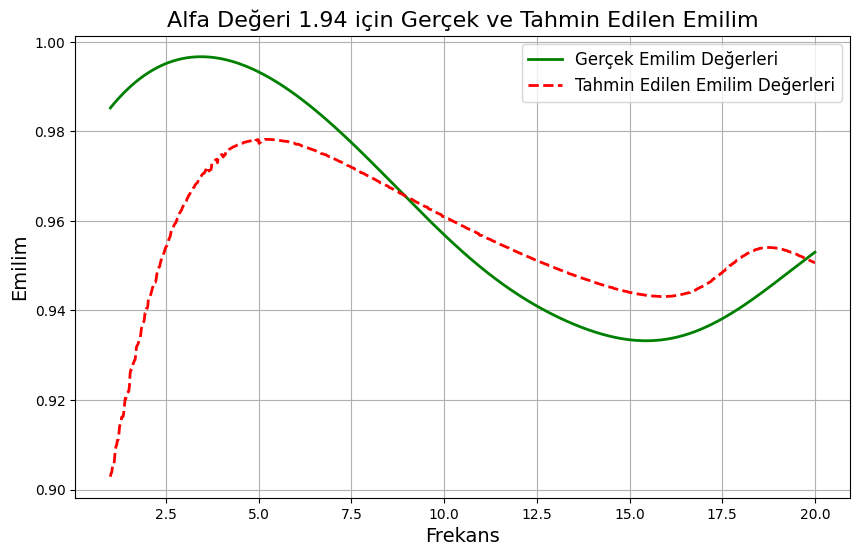

In [56]:
import matplotlib.pyplot as plt

selected_alfas = 1.94

filtered_test_data = df[df["Alfas"] == selected_alfas]
frenkans_values = filtered_test_data["Frenkans"]

test_data_for_selected_alfas = pd.DataFrame({'Alfas': [selected_alfas]*len(frenkans_values), 'Frenkans': frenkans_values})
predicted_emilim = model.predict(test_data_for_selected_alfas)

true_emilim_values = filtered_test_data["Emilim"]

plt.figure(figsize=(10, 6))
plt.plot(frenkans_values, true_emilim_values, label="Gerçek Emilim Değerleri", color="green", linewidth=2)# suan da burada gecek degeri gostermiyorum cunki gercek deger yok 
plt.plot(frenkans_values, predicted_emilim, label="Tahmin Edilen Emilim Değerleri", color="red", linestyle="--", linewidth=2)
plt.title(f"Alfa Değeri {selected_alfas} için Gerçek ve Tahmin Edilen Emilim", fontsize=16)
plt.xlabel("Frekans", fontsize=14)
plt.ylabel("Emilim", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
